In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd




In [10]:
# Load and preprocess the dataset
df = pd.read_csv('spotify.csv')


In [11]:
df.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


In [33]:
column_names = df.columns.tolist()

# Print the column names
print(column_names)

['title', 'artist', 'top genre', 'year', 'bpm', 'energy', 'danceability ', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness ', 'popularity', 'genre_encoded']


In [35]:
numeric_columns = ['title', 'artist', 'top genre', 'year', 'bpm', 'energy', 'danceability ', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness ', 'popularity', 'genre_encoded']

df_numeric = df[numeric_columns + ['genre_encoded']]

In [12]:
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['top genre'])

In [51]:
import random

# Sample data (intent and response pairs)
sample_data = [
    {
        "intent": "top genres",
        "response": "The top genres are pop, k-pop girl group, and bronx drill."
        "intent": "artist info"
        "Response" : "The artist of Flowers is Miley Cyrus."
        "Intent": "genre info"
        "Response": "The top genre of Flowers is pop."
        "Intent": "song popularity"
        "Response": "Flowers is a popular song with a popularity score of 98."
        "Intent": "tempo of a song"
        "Response": "The tempo of Flowers is 118 BPM."
        "Intent": "energy level"
        "Response": "Flowers has an energy level of 68."
        "Intent": "danceability"
        "Response": "The danceability score of Flowers is 71."
        "Intent": "acousticness"
        "Response": "Flowers has a relatively low acousticness score of 6."
        "Intent": "song duration"
        "Response": "The duration of Flowers is 200 seconds."
    },
    # Add more intent-response pairs from your dataset
]

# Function to preprocess user input
def preprocess_input(text):
    # Implement text preprocessing steps (e.g., lowercase, remove punctuation, etc.)
    return text

# Function to generate a response given user input
def generate_response(user_input):
    preprocessed_input = preprocess_input(user_input)
    
    # Search for matching intent in the sample data
    matching_intents = [data["response"] for data in sample_data if data["intent"] == preprocessed_input]
    
    if matching_intents:
        # Randomly select a response from matching intents
        response = random.choice(matching_intents)
    else:
        response = "I'm sorry, but I don't have a response for that."
    
    return response

# Chat loop
#while True:
    #user_input = input("User: ")
    #response = generate_response(user_input)
    #print("ChatBot:", response)


User:  top genres


ChatBot: The top genres are pop, k-pop girl group, and bronx drill.


User:  song duration


ChatBot: I'm sorry, but I don't have a response for that.


KeyboardInterrupt: Interrupted by user

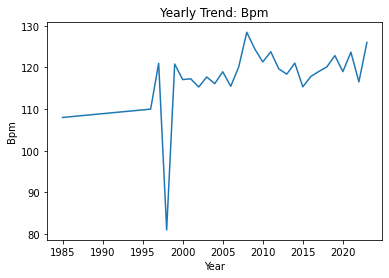

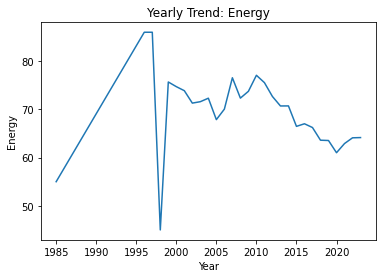

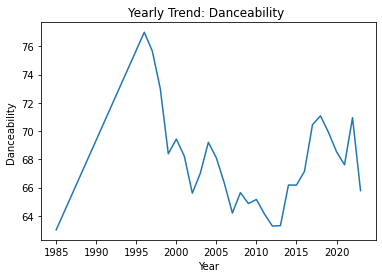

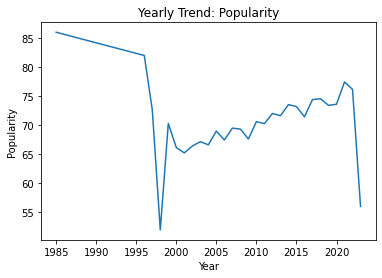

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("spotify.csv")

# Extract the year from the "year" column
data["year"] = pd.to_datetime(data["year"], format="%Y").dt.year

# Group the data by year and calculate the average values for attributes
yearly_data = data.groupby("year").mean()

# Plot yearly trends for selected attributes
attributes = ["bpm", "energy", "danceability ", "popularity"]

for attribute in attributes:
    plt.figure()
    plt.plot(yearly_data.index, yearly_data[attribute])
    plt.xlabel("Year")
    plt.ylabel(attribute.capitalize())
    plt.title(f"Yearly Trend: {attribute.capitalize()}")
    plt.show()


In [58]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

# Get the song titles or indexes
titles = data["title"]  # Use "title" or "index" depending on your preference

all_words = [word.lower() for title in titles for word in word_tokenize(title) if word not in string.punctuation]

# Calculate the frequency distribution of words
freq_dist = FreqDist(all_words)


# Get the most common word and its frequency
most_common_word = freq_dist.most_common(2)[0][0]
frequency = freq_dist.most_common(1)[0][1]

print(f"The most common word in the song titles is '{most_common_word}' with a frequency of {frequency}.")


The most common word in the song titles is 'feat' with a frequency of 330.


In [60]:
top_words = freq_dist.most_common(10)

# Print the top 5 words and their frequencies
print("Top 5 Words in Song Titles:")
for word, frequency in top_words:
    print(f"Word: {word}, Frequency: {frequency}")

Top 5 Words in Song Titles:
Word: feat, Frequency: 330
Word: the, Frequency: 199
Word: you, Frequency: 196
Word: i, Frequency: 152
Word: me, Frequency: 148
Word: love, Frequency: 119
Word: it, Frequency: 113
Word: radio, Frequency: 86
Word: a, Frequency: 84
Word: n't, Frequency: 84


In [62]:
# Define the top 5 words
top_words = ['feat', 'the', 'you', 'love', 'radio']  # Replace with your top 5 words

# Filter the dataset based on the top words
filtered_data = data[data['title'].str.contains('|'.join(top_words))]

# Analyze the attributes of the filtered dataset
common_characteristics = filtered_data[['bpm', 'energy', 'danceability ', 'popularity']]
mean_characteristics = common_characteristics.mean()

print("Common Characteristics among Songs with Top 5 Words:")
print(mean_characteristics)

Common Characteristics among Songs with Top 5 Words:
bpm              118.875622
energy            70.087065
danceability      69.251244
popularity        69.905473
dtype: float64
